# Handling Overfitting with CIFAR-10 (Images)

## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt

## Load CIFAR-10 dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 106s 1us/step


## Normalize pixel values

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## Flatten the images for feed-forward network

In [4]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

## One-hot encode labels

In [5]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Function to plot training history

In [6]:
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

## Baseline model without regularization

C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
313/313 - 18s - 57ms/step - accuracy: 0.3161 - loss: 1.9219 - val_accuracy: 0.3478 - val_loss: 1.8102
Epoch 2/50
313/313 - 14s - 45ms/step - accuracy: 0.3909 - loss: 1.7083 - val_accuracy: 0.3958 - val_loss: 1.6911
Epoch 3/50
313/313 - 14s - 46ms/step - accuracy: 0.4212 - loss: 1.6221 - val_accuracy: 0.4158 - val_loss: 1.6256
Epoch 4/50
313/313 - 14s - 46ms/step - accuracy: 0.4461 - loss: 1.5565 - val_accuracy: 0.4284 - val_loss: 1.5939
Epoch 5/50
313/313 - 14s - 45ms/step - accuracy: 0.4631 - loss: 1.5133 - val_accuracy: 0.4439 - val_loss: 1.5597
Epoch 6/50
313/313 - 15s - 46ms/step - accuracy: 0.4748 - loss: 1.4725 - val_accuracy: 0.4649 - val_loss: 1.5176
Epoch 7/50
313/313 - 15s - 46ms/step - accuracy: 0.4850 - loss: 1.4424 - val_accuracy: 0.4585 - val_loss: 1.5018
Epoch 8/50
313/313 - 14s - 45ms/step - accuracy: 0.4924 - loss: 1.4170 - val_accuracy: 0.4706 - val_loss: 1.4943
Epoch 9/50
313/313 - 14s - 46ms/step - accuracy: 0.5044 - loss: 1.3894 - val_accuracy: 0.4789 - 

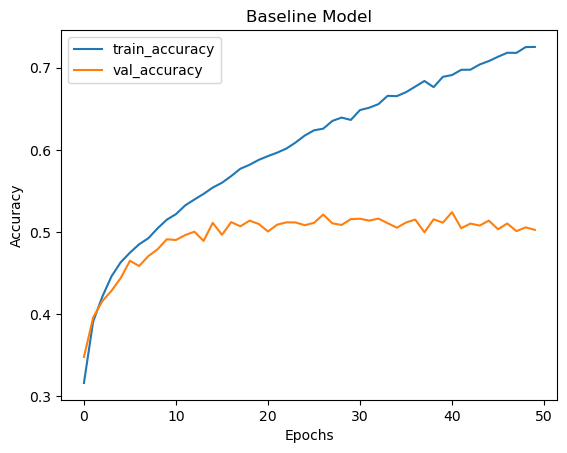

In [7]:
baseline_model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(32*32*3,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

baseline_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

baseline_history = baseline_model.fit(
    x_train_flat, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

plot_history(baseline_history, 'Baseline Model')

## Model with Dropout

Epoch 1/50
313/313 - 19s - 61ms/step - accuracy: 0.1831 - loss: 2.1781 - val_accuracy: 0.2856 - val_loss: 2.0057
Epoch 2/50
313/313 - 15s - 47ms/step - accuracy: 0.2194 - loss: 2.0628 - val_accuracy: 0.3025 - val_loss: 1.9823
Epoch 3/50
313/313 - 15s - 47ms/step - accuracy: 0.2232 - loss: 2.0326 - val_accuracy: 0.2994 - val_loss: 1.9566
Epoch 4/50
313/313 - 21s - 66ms/step - accuracy: 0.2356 - loss: 2.0138 - val_accuracy: 0.3066 - val_loss: 1.9509
Epoch 5/50
313/313 - 15s - 48ms/step - accuracy: 0.2452 - loss: 2.0051 - val_accuracy: 0.3275 - val_loss: 1.9555
Epoch 6/50
313/313 - 15s - 48ms/step - accuracy: 0.2478 - loss: 1.9996 - val_accuracy: 0.3058 - val_loss: 1.9484
Epoch 7/50
313/313 - 14s - 46ms/step - accuracy: 0.2499 - loss: 1.9860 - val_accuracy: 0.3055 - val_loss: 1.9403
Epoch 8/50
313/313 - 15s - 48ms/step - accuracy: 0.2545 - loss: 1.9728 - val_accuracy: 0.3155 - val_loss: 1.9518
Epoch 9/50
313/313 - 21s - 66ms/step - accuracy: 0.2623 - loss: 1.9633 - val_accuracy: 0.3197 - 

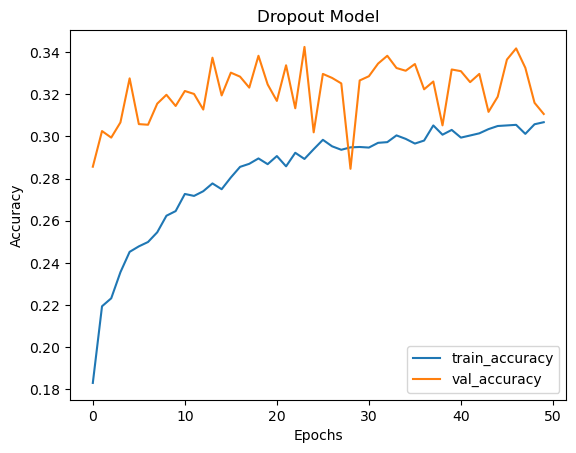

In [8]:
dropout_model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(32*32*3,)),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

dropout_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

dropout_history = dropout_model.fit(
    x_train_flat, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

plot_history(dropout_history, 'Dropout Model')

## Model with L2 weight regularization

Epoch 1/50
313/313 - 13s - 42ms/step - accuracy: 0.3080 - loss: 2.5120 - val_accuracy: 0.3535 - val_loss: 2.1208
Epoch 2/50
313/313 - 11s - 35ms/step - accuracy: 0.3890 - loss: 1.9551 - val_accuracy: 0.3883 - val_loss: 1.8893
Epoch 3/50
313/313 - 12s - 37ms/step - accuracy: 0.4164 - loss: 1.7935 - val_accuracy: 0.3913 - val_loss: 1.8292
Epoch 4/50
313/313 - 12s - 38ms/step - accuracy: 0.4243 - loss: 1.7342 - val_accuracy: 0.4296 - val_loss: 1.7482
Epoch 5/50
313/313 - 13s - 40ms/step - accuracy: 0.4461 - loss: 1.6753 - val_accuracy: 0.4236 - val_loss: 1.7432
Epoch 6/50
313/313 - 20s - 65ms/step - accuracy: 0.4471 - loss: 1.6579 - val_accuracy: 0.4258 - val_loss: 1.7094
Epoch 7/50
313/313 - 21s - 66ms/step - accuracy: 0.4605 - loss: 1.6209 - val_accuracy: 0.4611 - val_loss: 1.6405
Epoch 8/50
313/313 - 21s - 66ms/step - accuracy: 0.4660 - loss: 1.6034 - val_accuracy: 0.4653 - val_loss: 1.6248
Epoch 9/50
313/313 - 13s - 41ms/step - accuracy: 0.4699 - loss: 1.5835 - val_accuracy: 0.4537 - 

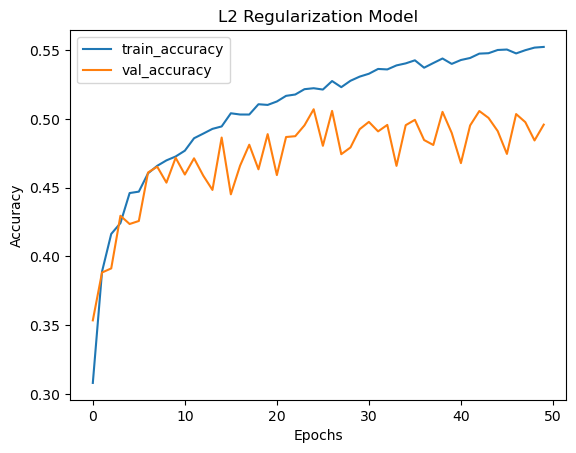

In [9]:
l2_model = keras.Sequential([
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(32*32*3,)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

l2_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

l2_history = l2_model.fit(
    x_train_flat, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

plot_history(l2_history, 'L2 Regularization Model')

## Model with Early Stopping

Epoch 1/50
313/313 - 11s - 34ms/step - accuracy: 0.3177 - loss: 1.9205 - val_accuracy: 0.3591 - val_loss: 1.8084
Epoch 2/50
313/313 - 9s - 30ms/step - accuracy: 0.3916 - loss: 1.7051 - val_accuracy: 0.3977 - val_loss: 1.7087
Epoch 3/50
313/313 - 8s - 26ms/step - accuracy: 0.4201 - loss: 1.6252 - val_accuracy: 0.4275 - val_loss: 1.6188
Epoch 4/50
313/313 - 10s - 32ms/step - accuracy: 0.4411 - loss: 1.5678 - val_accuracy: 0.4308 - val_loss: 1.6063
Epoch 5/50
313/313 - 11s - 35ms/step - accuracy: 0.4608 - loss: 1.5150 - val_accuracy: 0.4440 - val_loss: 1.5850
Epoch 6/50
313/313 - 10s - 33ms/step - accuracy: 0.4731 - loss: 1.4772 - val_accuracy: 0.4440 - val_loss: 1.5834
Epoch 7/50
313/313 - 10s - 31ms/step - accuracy: 0.4829 - loss: 1.4514 - val_accuracy: 0.4626 - val_loss: 1.5277
Epoch 8/50
313/313 - 11s - 35ms/step - accuracy: 0.4938 - loss: 1.4181 - val_accuracy: 0.4599 - val_loss: 1.5404
Epoch 9/50
313/313 - 10s - 33ms/step - accuracy: 0.5028 - loss: 1.3978 - val_accuracy: 0.4735 - va

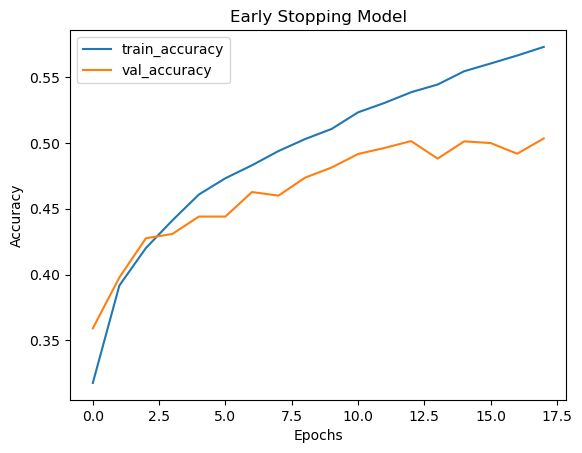

Early stopping triggered at epoch: 18


In [10]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

early_stop_model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(32*32*3,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

early_stop_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

early_stop_history = early_stop_model.fit(
    x_train_flat, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=2
)

plot_history(early_stop_history, 'Early Stopping Model')
print(f"Early stopping triggered at epoch: {len(early_stop_history.history['loss'])}")
